# Experiment 0 Data Visualizations
Here, we use the data from the Experiment 0 to visualize the performance of routing strategies on a local machine. Experiment 0 is a dummy experiment.

## Import and Data

In [34]:
import pandas as pd
import glob
import os

# Find the latest results.csv in data/exp0/
exp0_dirs = sorted(glob.glob('../../../../data/exp0/*'), reverse=True)
csv_path = None
for d in exp0_dirs:
    f = os.path.join(d, 'results.csv')
    if os.path.exists(f):
        csv_path = f
        break
if not csv_path:
    raise FileNotFoundError('No results.csv found in data/exp0/')

# Load the data
df = pd.read_csv(csv_path)
display(df.head())

,id,router_type,input,routing_time
0,0,basic,query_0,1.250010e-06
1,1,basic,query_1,8.750358e-07
2,2,basic,query_2,2.500019e-07
3,3,basic,query_3,2.080342e-07
4,4,basic,query_4,2.079760e-07


## CDF for All Routing Strategies

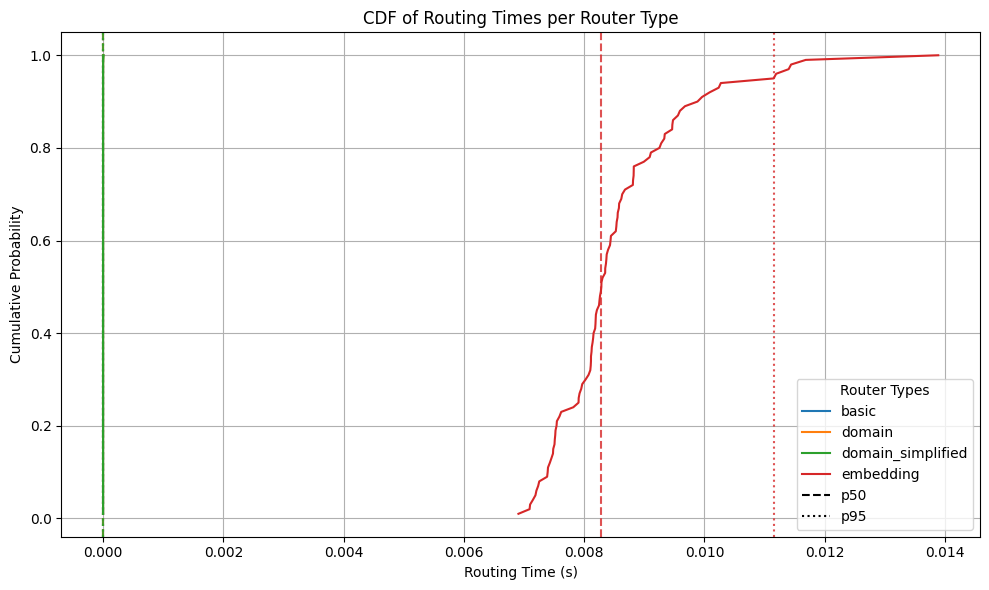

In [37]:
# Compute percentiles
percentiles = (
    df.groupby("router_type")["routing_time"]
    .quantile([0.50, 0.95])
    .unstack()
    .rename(columns={0.50: "p50", 0.95: "p95"})
)

# Plot CDFs
plt.figure(figsize=(10, 6))

colors = plt.cm.tab10.colors  # distinct colors
for i, (router, group) in enumerate(df.groupby("router_type")):
    color = colors[i % len(colors)]
    sorted_vals = np.sort(group["routing_time"])
    cdf = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)
    
    # CDF curve
    plt.plot(sorted_vals, cdf, label=router, color=color)
    
    # p50 and p95 lines in same color
    p50 = percentiles.loc[router, "p50"]
    p95 = percentiles.loc[router, "p95"]
    plt.axvline(p50, linestyle="--", color=color, alpha=0.8)
    plt.axvline(p95, linestyle=":", color=color, alpha=0.8)

# Add global legend entries for line styles
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color="black", linestyle="--", label="p50"),
    Line2D([0], [0], color="black", linestyle=":", label="p95")
]
plt.legend(title="Router Types", handles=plt.gca().get_legend_handles_labels()[0] + custom_lines)

plt.xlabel("Routing Time (s)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Routing Times per Router Type")
plt.grid(True)
plt.tight_layout()
plt.show()

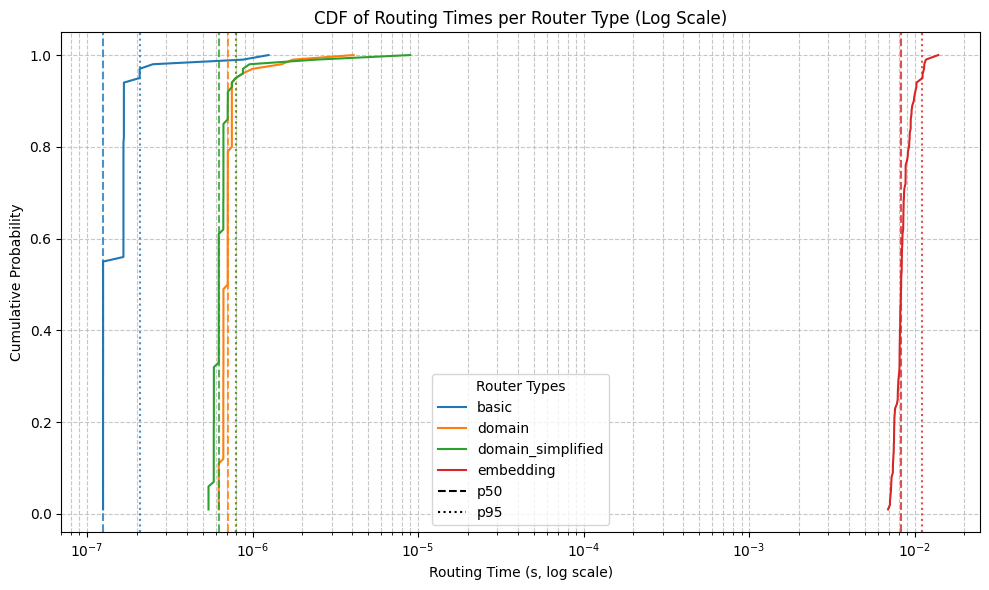

In [38]:
# Compute percentiles
percentiles = (
    df.groupby("router_type")["routing_time"]
    .quantile([0.50, 0.95])
    .unstack()
    .rename(columns={0.50: "p50", 0.95: "p95"})
)

# Plot CDFs
plt.figure(figsize=(10, 6))

colors = plt.cm.tab10.colors  # distinct colors
for i, (router, group) in enumerate(df.groupby("router_type")):
    color = colors[i % len(colors)]
    sorted_vals = np.sort(group["routing_time"])
    cdf = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)
    
    # CDF curve
    plt.plot(sorted_vals, cdf, label=router, color=color)
    
    # p50 and p95 lines in same color
    p50 = percentiles.loc[router, "p50"]
    p95 = percentiles.loc[router, "p95"]
    plt.axvline(p50, linestyle="--", color=color, alpha=0.8)
    plt.axvline(p95, linestyle=":", color=color, alpha=0.8)

# Add global legend entries for line styles
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color="black", linestyle="--", label="p50"),
    Line2D([0], [0], color="black", linestyle=":", label="p95")
]
plt.legend(title="Router Types", handles=plt.gca().get_legend_handles_labels()[0] + custom_lines)

plt.xscale("log")
plt.xlabel("Routing Time (s, log scale)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Routing Times per Router Type (Log Scale)")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

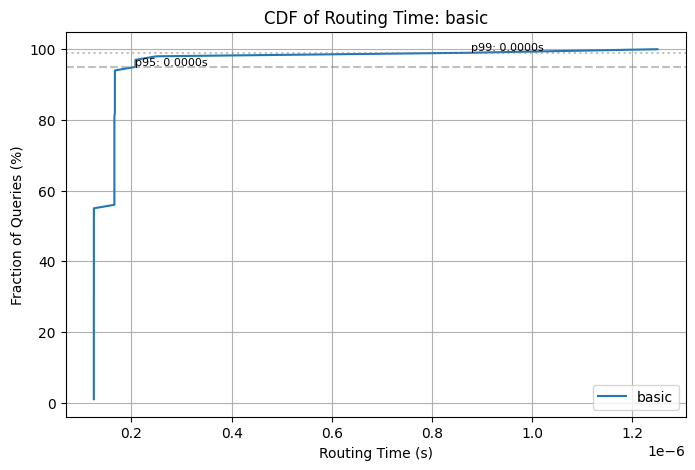

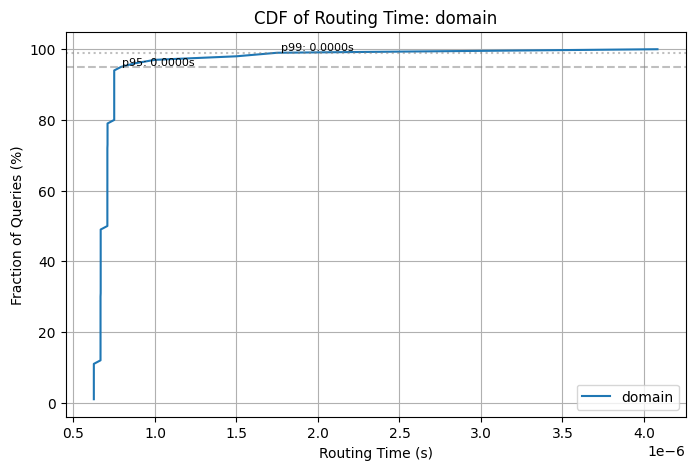

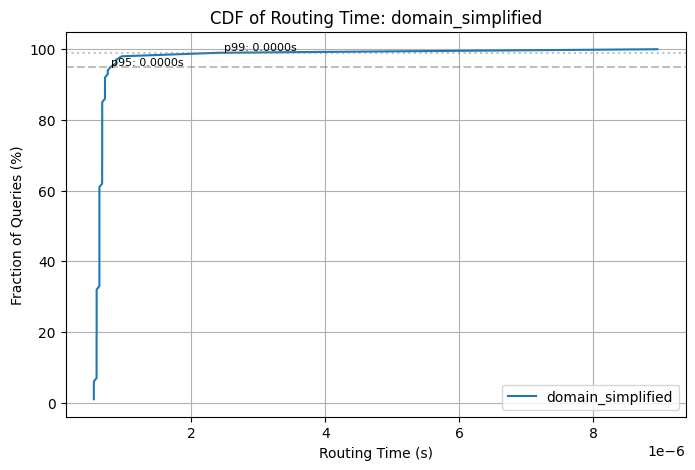

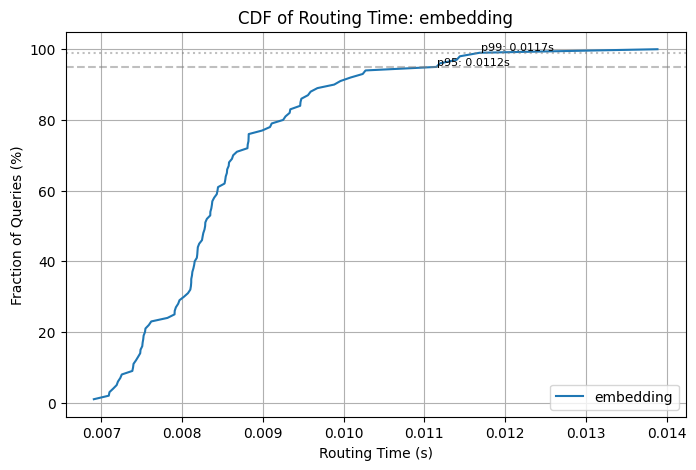

In [40]:
for router_type in df['router_type'].unique():
    plt.figure(figsize=(8, 5))
    subset = df[df['router_type'] == router_type]['routing_time']
    sorted_times = np.sort(subset)
    cdf = np.arange(1, len(sorted_times) + 1) / len(sorted_times) * 100  # Percentages

    plt.plot(sorted_times, cdf, label=router_type)
    plt.axhline(95, color='gray', linestyle='--', alpha=0.5)
    plt.axhline(99, color='gray', linestyle=':', alpha=0.5)
    p95_time = np.percentile(subset, 95)
    p99_time = np.percentile(subset, 99)
    plt.text(p95_time, 95, f"p95: {p95_time:.4f}s", rotation=0, va='bottom', ha='left', fontsize=8)
    plt.text(p99_time, 99, f"p99: {p99_time:.4f}s", rotation=0, va='bottom', ha='left', fontsize=8)

    plt.xlabel('Routing Time (s)')
    plt.ylabel('Fraction of Queries (%)')
    plt.title(f'CDF of Routing Time: {router_type}')
    plt.legend()
    plt.grid(True)
    plt.show()